In [1]:
# import library ที่จำเป็น
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# อ่านข้อมูล train
data = pd.read_csv('train.csv')
print('data = ', len(data))

data =  68613


In [6]:
# ตรวจสอบ void fraction / void_volume / surface_area < 0 
print('void_fraction or void_volume or surface_area < 0', len(data[~((data['void_fraction']>=0)&(data['void_volume [cm^3/g]']>=0)&(data['surface_area [m^2/g]']>=0))]))
# clean ออก
data = data[(data['void_fraction']>=0)&(data['void_volume [cm^3/g]']>=0)&(data['surface_area [m^2/g]']>=0)]
print('จำนวน data ที่เหลือ ', len(data))

void_fraction or void_volume or surface_area < 0 56
จำนวน data ที่เหลือ  68557


In [7]:
# replace inf, -inf ใน heat_adsorption_CO2_P0.15bar_T298K [kcal/mol] ด้วย unique value เพื่อใช้ลบออก
data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'] = data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].replace([np.inf, np.nan], [-2000, -2000])
# จำนวน heat_adsorption_CO2_P0.15bar_T298K [kcal/mol] ที่เป็น inf, -inf
print('heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]', len(data[data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']<0]))
# clean ออก
data = data[data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']>=0]
print('จำนวน data ที่เหลือ ', len(data))

heat_adsorption_CO2_P0.15bar_T298K [kcal/mol] 2089
จำนวน data ที่เหลือ  66468


In [8]:
# set target binary ตามคำแนะนำในอบรม
TARGET = "CO2_working_capacity [mL/g]"
THRESHOLD = 200 # in units of mL CO2/g
data['TARGET_BINARY'] = [2 if value > THRESHOLD else 1 if value >=0 else 0 for value in data[TARGET]]

In [9]:
# นิยามฟังก์ชั่นสำหรับคำนวณ density และ แยก functional groups
# โดยกรณี functional_groups นั้นพบ NaN แต่ก็พบใน pretest เช่นกัน จึงคงไว้ไม่ตัดออก
def cal_density(df):
  return (df["weight [u]"] / df["volume [A^3]"]) * 1.66054

def split_functional_groups(a):
    return (a.split("-") + [' ', ' '])[:2]

data['functional_groups'] = data['functional_groups'].replace([np.nan], [" "])
data['functional_groups-1'] = data['functional_groups'].apply(split_functional_groups).map(lambda x:x[0])
data['functional_groups-2'] = data['functional_groups'].apply(split_functional_groups).map(lambda x:x[1])

data['density [g/cm^3]'] = cal_density(data)
data['density [cm^3/g]'] = 1./cal_density(data)

In [10]:
# ตรวจสอบกรณี void_fraction = 0 และ surface_area > 0
data[((data['void_fraction']==0)&(data['surface_area [m^2/g]']>0))]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g]


In [11]:
# ตรวจสอบกรณี void_fraction = 0 และ void_volume > 0
data[((data['void_fraction']==0)&(data['void_volume [cm^3/g]']>0))]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g]


In [14]:
# ตรวจสอบกรณี void_fraction = 0 และ void_volume = 0 และ  surface_area > 0
data[((data['void_fraction']==0)&(data['void_volume [cm^3/g]']==0))&(data['surface_area [m^2/g]']==0)]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g]
37,mof_unit_38,810.133031,691.597320,0.0,0.0,0.0,NHMe-OH,2,10,13,pcu,25.080429,8.718779,149.118598,1,NHMe,OH,1.417576,0.705430
53,mof_unit_54,1136.093302,953.552560,0.0,0.0,0.0,Cl,2,9,12,pcu,50.993919,7.797430,209.780268,2,Cl,,1.393734,0.717497
62,mof_unit_63,1105.832336,813.773143,0.0,0.0,0.0,F-Et,2,4,9,pcu,18.762937,8.666317,91.583974,1,F,Et,1.221978,0.818345
152,mof_unit_153,1683.048333,1294.434240,0.0,0.0,0.0,Cl-OPr,2,14,23,pcu,16.104202,8.020039,107.280442,1,Cl,OPr,1.277123,0.783010
243,mof_unit_244,1840.691522,1404.457740,0.0,0.0,0.0,Me-Br,9,16,24,sra,80.708174,10.882273,270.501200,2,Me,Br,1.267001,0.789265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64959,mof_unit_64960,1754.226517,1655.503156,0.0,0.0,0.0,HCO-Pr,10,47,48,etb,13.325350,9.039697,27.264373,1,HCO,Pr,1.567089,0.638126
65176,mof_unit_65177,2036.266033,2445.647240,0.0,0.0,0.0,SO3H,4,24,24,acs,5.653633,9.665305,24.679109,1,SO3H,,1.994383,0.501408
65241,mof_unit_65242,1543.907313,1496.785520,0.0,0.0,0.0,SO3H-Ph,9,10,16,sra,28.010728,9.373812,23.041385,1,SO3H,Ph,1.609858,0.621173
65767,mof_unit_65768,1619.571104,1587.384596,0.0,0.0,0.0,OMe-H,10,46,50,etb,7.976661,9.437893,21.189721,1,OMe,H,1.627539,0.614424


In [18]:
# ตรวจสอบกรณี void_fraction > 0 แต่ void_volume = 0
print(len(data[((data['void_fraction']>0)&(data['void_volume [cm^3/g]']==0))]))
data[((data['void_fraction']>0)&((data['void_volume [cm^3/g]']==0)))]

33


,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g]
615,mof_unit_616,2986.257706,2321.749040,0.0,0.00286,0.0,Pr,9,18,29,sra,14.075132,9.950743,73.746132,1,Pr,,1.291033,0.774574
5772,mof_unit_5773,2208.884643,2263.789760,0.0,0.00815,0.0,Br-CN,9,16,18,sra,48.732697,9.463714,173.301652,1,Br,CN,1.701815,0.587608
6631,mof_unit_6632,1595.944227,1444.496040,0.0,0.01300,0.0,NO2-OH,9,22,24,sra,36.790319,8.458382,110.950259,1,NO2,OH,1.502962,0.665353
8227,mof_unit_8228,1686.566488,1342.710140,0.0,0.00789,0.0,OPr-CN,9,11,2,sra,12.849728,9.628730,81.840165,1,OPr,CN,1.321990,0.756435
9625,mof_unit_9626,3951.837174,3858.143280,0.0,0.01559,0.0,NO2-Ph,4,1,24,acs,13.325337,7.505813,82.983320,1,NO2,Ph,1.621170,0.616838
12720,mof_unit_12721,4049.958188,5300.104680,0.0,0.02109,0.0,I-NO2,4,1,24,acs,47.063704,11.053120,49.953154,1,I,NO2,2.173118,0.460168
12735,mof_unit_12736,2003.788670,1960.928280,0.0,0.01183,0.0,HCO-OH,4,12,15,acs,19.928794,9.048823,80.270617,1,HCO,OH,1.625022,0.615376
16709,mof_unit_16710,3869.369250,3493.429760,0.0,0.01106,0.0,NO2-COOH,4,1,11,acs,61.881560,10.969273,168.174209,1,NO2,COOH,1.499206,0.667020
20775,mof_unit_20776,4311.899490,5695.630080,0.0,0.00947,0.0,COOH-Br,4,1,24,acs,45.870785,9.391734,90.220937,1,COOH,Br,2.193423,0.455908
23162,mof_unit_23163,2019.112185,1665.144040,0.0,0.01350,0.0,NHMe,4,12,15,acs,35.406540,8.858648,81.430445,1,NHMe,,1.369433,0.730229


In [19]:
# ทำการปรับค่า void_volume ใหม่ โดยการยึดตาม void_fraction

def cal_void_volume(df):
    return df['void_fraction'] * (df["volume [A^3]"])/(df["weight [u]"]* 1.66054)

values = cal_void_volume(data)

data['void_volume [cm^3/g]'] = values*((data['void_fraction']>0)&(data['void_volume [cm^3/g]']==0)) + data['void_volume [cm^3/g]']*(~((data['void_fraction']>0)&((data['void_volume [cm^3/g]']==0))))

In [21]:
# ตรวจสอบกรณี void_fraction > 0 แต่ void_volume = 0 หลังการปรับค่า
data[((data['void_fraction']>0)&((data['void_volume [cm^3/g]']==0)))]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g]


In [22]:
# ใส่ flag เพื่อใช้ตรวจสอบภายหลัง กรณีที่ surface_area = 0 แต่ void_fraction > 0
data['surface_flag'] = 0*((data['surface_area [m^2/g]']==0) & (data['void_fraction']>0)) + 1*(~((data['surface_area [m^2/g]']==0) & (data['void_fraction']>0)))

In [24]:
# สร้างตัวแปร data1 โดยคัดกรณี void_fraction >0 และ surface_area = 0
data1 = data[((data['void_fraction']>0)&(data['surface_area [m^2/g]']==0))]
data1

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g],surface_flag
0,mof_unit_1,1116.667429,875.240600,0.0,0.07899,0.060700,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502,1,COOH,OEt,1.301526,0.768329,0
4,mof_unit_5,1137.800963,901.736120,0.0,0.07778,0.059100,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001,1,NHMe,OH,1.316020,0.759867,0
11,mof_unit_12,1175.475860,1397.051280,0.0,0.05704,0.028900,Me-Br,2,22,24,pcu,58.106974,7.407898,101.964812,1,Me,Br,1.973549,0.506701,0
13,mof_unit_14,1071.619874,701.628600,0.0,0.10455,0.096200,OEt-CN,2,12,22,pcu,31.664456,7.427183,133.371121,1,OEt,CN,1.087216,0.919780,0
19,mof_unit_20,919.305781,689.174400,0.0,0.07816,0.062800,CN,3,10,18,pcu,47.332721,7.957782,136.387400,1,CN,,1.244854,0.803307,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66327,mof_unit_66328,1737.316693,1826.919016,0.0,0.03946,0.022600,Br-H,10,47,49,etb,20.408789,6.348634,16.613469,1,Br,H,1.746183,0.572678,0
66348,mof_unit_66349,1157.233975,1658.135855,0.0,0.06235,0.026200,Br-F,3,14,22,pcu,14.440443,6.526421,22.038710,1,Br,F,2.379295,0.420293,0
66398,mof_unit_66399,1618.117631,1671.636320,0.0,0.06529,0.038100,Et-Br,9,4,12,sra,31.001223,6.455905,13.252675,1,Et,Br,1.715462,0.582933,0
66439,mof_unit_66440,1252.881442,968.163080,0.0,0.04015,0.031300,OPr,1,10,10,pcu,22.807274,7.947595,15.151221,1,OPr,,1.283181,0.779313,0


In [25]:
# สร้างตัวแปร data2 โดยคัดกรณีอื่นที่ไม่ใช่ void_fraction >0 และ surface_area = 0
data2 = data[~(((data['void_fraction']>0)&(data['surface_area [m^2/g]']==0)))]
data2

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g],surface_flag
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774,1,F,OMe,1.326090,0.754097,1
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011,1,OMe,COOH,1.178856,0.848280,1
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004,1,H,SO3H,0.982408,1.017907,1
5,mof_unit_6,3954.659761,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,23,sra,17.146541,5.398304,55.786959,1,Pr,NO2,0.647909,1.543427,1
6,mof_unit_7,3565.914939,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,55,etb,18.363791,6.303857,111.690462,1,NH2,,0.910268,1.098577,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,mof_unit_66520,1426.479810,1272.451540,1343.62,0.30190,0.2038,Me-I,3,12,21,pcu,5.867674,4.485481,7.602105,1,Me,I,1.481238,0.675111,1
66520,mof_unit_66521,23943.701366,5497.752320,4182.24,0.66340,1.7399,HCO-Me,1,9,27,pcu,4.060772,3.605688,2.675231,1,HCO,Me,0.381279,2.622749,1
66521,mof_unit_66522,14389.971556,4396.164320,4149.64,0.57051,1.1246,OPr-Cl,1,9,20,pcu,4.313411,3.361233,-1.686092,0,OPr,Cl,0.507298,1.971227,1
66522,mof_unit_66523,16997.806645,3932.703680,4326.62,0.66963,1.7430,CN,2,2,5,nbo,3.447440,2.781566,-7.546805,0,CN,,0.384191,2.602869,1


<AxesSubplot:>

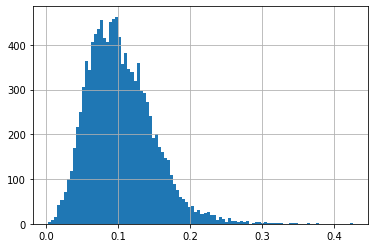

In [26]:
# ดู histogram ของ void_fraction กรณี surface_area = 0 พบว่าค่าสูงสุดอยู่ที่ไม่เกิน 0.45
data1['void_fraction'].hist(bins=100)

coef: [57569.841409555585, -80351.33991899503, 39331.56795106721, 952.8391301785118, -3.1803002787487036]
0.004660266928714019


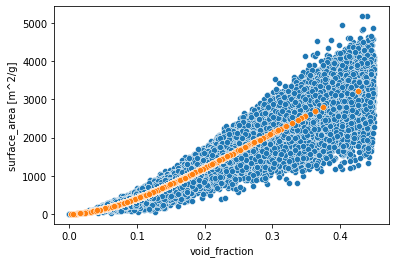

In [30]:
# ทำการตรวจสอบด้วยการ fit polynomial กับข้อมูลในช่วงไม่เกิน 0.45
X = data2[data2['void_fraction']<0.45]['void_fraction'].to_numpy().reshape(-1, )
y = data2[data2['void_fraction']<0.45]['surface_area [m^2/g]'].to_numpy().reshape(-1, )

# เลือกทำการ fit ข้อมูลด้วย polynomial degree 4
coef = np.polyfit(X, y, 4)
print('coef:', list(coef))
_x = data1['void_fraction'].to_numpy().reshape(-1, )
_y= np.polyval(coef, _x)+0.14

sns.scatterplot(x='void_fraction', y='surface_area [m^2/g]', data=data2[data2['void_fraction']<0.45])
sns.scatterplot(x=_x, y=_y)
print(_y.min())

In [32]:
# ดำเนินการแทนที่ข้อมูล surface_area ด้วยค่าที่ทำการ interpolation กรณีที่ void_fraction > 0 แต่ะ surface_area = 0
values = np.polyval(coef, data['void_fraction'].values.reshape(-1, )) +0.14
i = 0
for idx, d in data.iterrows():
    if d['void_fraction']>0 and d['surface_area [m^2/g]'] ==0:     
        data.at[idx, 'surface_area [m^2/g]'] = values[i]
    i+=1

In [34]:
# ตรวจสอบกรณี void_fraction >0 และ surface_area = 0
data[((data['void_fraction']>0)&(data['surface_area [m^2/g]']==0))]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],TARGET_BINARY,functional_groups-1,functional_groups-2,density [g/cm^3],density [cm^3/g],surface_flag


In [35]:
# สรุปข้อมูล
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volume [A^3],66468.0,3501.425884,4896.158419,606.576038,1569.924155,2223.697104,3733.408013,223964.854408
weight [u],66468.0,1649.164066,1263.495641,439.281220,889.909870,1248.337240,1879.932850,22595.928960
surface_area [m^2/g],66468.0,1800.774557,1267.712776,0.000000,777.065000,1601.056858,2557.045000,7083.530000
void_fraction,66468.0,0.268344,0.156535,0.000000,0.152520,0.249055,0.349180,0.872060
void_volume [cm^3/g],66468.0,0.388186,0.479189,0.000000,0.129900,0.258300,0.452600,6.610100
metal_linker,66468.0,4.125248,3.098652,1.000000,2.000000,3.000000,4.000000,12.000000
organic_linker1,66468.0,11.512216,10.197361,1.000000,4.000000,10.000000,16.000000,59.000000
organic_linker2,66468.0,20.268851,9.729278,1.000000,14.000000,20.000000,25.000000,59.000000
CO2/N2_selectivity,66468.0,27.279558,23.191123,1.337830,13.337764,20.137631,33.423086,914.244140
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],66468.0,6.019628,1.383238,1.612299,5.267002,5.898316,6.767547,17.155375


In [37]:
# พิจารณาดูชุดข้อมูล pretest พบว่า weight อยู่ในช่วง 450 - 18000 จึงคัด dataset ในช่วงครอบคลุมนิดหน่อย และตัดค่าที่เกินเยอะ ออกไป
print('before', len(data))
print('weight [u]', len(data[(data['weight [u]']>=18000) | ((data['weight [u]']<450))]))
data = data[(data['weight [u]']<18000) & (data['weight [u]']>450)]
print('after', len(data))

before 66468
weight [u] 25
after 66443


In [38]:
# พิจารณาดูชุดข้อมูล pretest พบว่า volume อยู่ในช่วง 660 - 90000 จึงคัด dataset ในช่วงครอบคลุมนิดหน่อย และตัดค่าที่เกินเยอะ ออกไป
print('before', len(data))
print('volume [A^3]', len(data[(data['volume [A^3]']>=90000) | (data['volume [A^3]']<=660)]))
data = data[(data['volume [A^3]']<90000) & (data['volume [A^3]']>660)]
print('after', len(data))

before 66443
volume [A^3] 17
after 66426


In [39]:
# พิจารณาดูชุดข้อมูล pretest พบว่า heat_adsorption_CO2_P0.15bar_T298 อยู่ในช่วง 1.7 - 11 จึงคัด dataset ในช่วงครอบคลุมนิดหน่อย และตัดค่าที่เกินเยอะ ออกไป
print('before', len(data))
print('heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]', len(data[(data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']>=11)|(data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']<1.7)]))
data = data[(data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']<11)&(data['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']>1.7)]
print('after', len(data))

before 66426
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol] 113
after 66313


In [40]:
# พิจารณาดูชุดข้อมูล pretest surface_area อยู่ในช่วง 0 - 6750 จึงคัด dataset ในช่วงครอบคลุมนิดหน่อย และตัดค่าที่เกินเยอะ ออกไป
print('before', len(data))
print('surface_area [m^2/g]', len(data[(data['surface_area [m^2/g]']>=6750)]))
data = data[(data['surface_area [m^2/g]']<6750)]
print('after', len(data))

before 66313
surface_area [m^2/g] 12
after 66301


In [41]:
# พิจารณาดูชุดข้อมูล pretest CO2/N2_selectivity อยู่ในช่วง 0 - 800 จึงคัด dataset ในช่วงครอบคลุมนิดหน่อย และตัดค่าที่เกินเยอะ ออกไป
print('before', len(data))
print('CO2/N2_selectivity', len(data[(data['CO2/N2_selectivity']>=800)]))
data = data[(data['CO2/N2_selectivity']<800)]
print('after', len(data))

before 66301
CO2/N2_selectivity 1
after 66300


In [42]:
# ดู correlation 
data.corr()['CO2_working_capacity [mL/g]']

volume [A^3]                                    -0.305478
weight [u]                                      -0.153067
surface_area [m^2/g]                            -0.542139
void_fraction                                   -0.577316
void_volume [cm^3/g]                            -0.483816
metal_linker                                     0.191318
organic_linker1                                 -0.058142
organic_linker2                                 -0.093312
CO2/N2_selectivity                               0.688502
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    0.690342
CO2_working_capacity [mL/g]                      1.000000
TARGET_BINARY                                    0.812016
density [g/cm^3]                                 0.401352
density [cm^3/g]                                -0.461055
surface_flag                                    -0.311196
Name: CO2_working_capacity [mL/g], dtype: float64

In [ ]:
# train
# รวมไฟล์ที่เกิดจากการคำนวณฟีเจอร์ต่างๆ
structure_data = pd.read_csv('train_features_full.csv')
# structure_data = structure_data.drop(['n_ol1', 'n_ol2', 'n_fg1', 'n_fg2'], axis=1)
final = pd.merge(data, structure_data, on="MOFname")

RDF_data = pd.concat([
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_0_20000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_20000_40000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_40000_60000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_60000_65000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_65000_.csv')
])
RDF_data_R = pd.concat([
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_0_30000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_30000_60000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_60000_61000.csv'),     
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_61000_62000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_61000_62000.csv'),   
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_63000_65000.csv'), 
    pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_65000_.csv')
])

RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_1.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_15_25.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_22_24.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_4_6_8_12.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_14_16_18.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_3_5_7_9.csv')
RDF_data_R = RDF_data_R.drop(['RDF-5-1', 'RDF-5-2', 'RDF-5-3'], 1)
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_11_13_17_19.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_23_27_29.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_21_26_28.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_2_3_4_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_5_6_7_8_9_10_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_11_12_13_14_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_15_16_17_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_18_19_20_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_21_22_23_24_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_25_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")
RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_26_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")
RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_27_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")
RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_28_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")
RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_29_p5.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_2_p_2.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_2_p_8.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

RDF_data_R = pd.read_csv('/mnt/c/Users/Cue/Desktop/tmlcc-2021/train_features_RDF_R_3_p_2_8.csv')
RDF_data = pd.merge(RDF_data, RDF_data_R, on="MOFname")

final = pd.merge(final, RDF_data, on="MOFname")
print(len(data), len(final))

In [ ]:
from sklearn.model_selection import train_test_split

# สร้าง trainset 80% และ testset 20%
trainset, testset = train_test_split(final, test_size=0.2, stratify=data['TARGET_BINARY'], random_state=33)
trainset.to_csv(f'trainset.csv', index=False)
testset.to_csv(f'testset.csv', index=False)

# ตรวจสอบจำนวน trainset และ testset
print(len(trainset), len(testset))